# Code for IBM Assignmenr on PIMA Indian Diabetes Prediction
## Assignment 1
### Professor Mohtat

Name: ---------------------Mahsa Dorri---------------------------------

Date: ---------------------Feb 28 2024-------------------------------------

File Name: MahsaDorri_Lab1

### Instructions

.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



/Users/mahsadorri/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Part 1: Data Loading

In [2]:
# Load the dataset
data = pd.read_csv('/Users/mahsadorri/Downloads/diabetes1.csv')


### Part 2: Data Preprocessing

In [3]:
# Replace zeros with NaNs in specified columns assuming columns 2 to 6 are 'Glucose' to 'BMI'
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_impute:
    data[col].replace(0, np.nan, inplace=True)

# Separate 'Outcome' column before imputation
outcome = data['Outcome']
data_without_outcome = data.drop('Outcome', axis=1)

# Apply imputation only to the columns without the 'Outcome'
imp = IterativeImputer(max_iter=10, random_state=0)
data_without_outcome_imputed = pd.DataFrame(imp.fit_transform(data_without_outcome), columns=data_without_outcome.columns)

# Reattach the 'Outcome' column after imputation
data_imputed = pd.concat([data_without_outcome_imputed, outcome], axis=1)

# Ensure correct data types
data_imputed[columns_to_impute] = data_imputed[columns_to_impute].astype(float)
data_imputed['Outcome'] = data_imputed['Outcome'].astype(int)


/var/folders/j2/h4vx0kps61q_zfy2ms363w5w0000gn/T/ipykernel_31349/805706683.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace(0, np.nan, inplace=True)


### Part 3: Create and Train Model

In [4]:
# Split the data into training and testing sets (85% train, 15% test)
X_train, X_test, y_train, y_test = train_test_split(data_imputed.drop('Outcome', axis=1), 
                                                    data_imputed['Outcome'], 
                                                    test_size=0.15, 
                                                    random_state=42)

# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
svc = SVC()
random_forest = RandomForestClassifier()

# Dictionary of models for easier access
models = {'Logistic Regression': log_reg, 'Support Vector Machine': svc, 'Random Forest': random_forest}

# Train and evaluate the models
accuracy_scores = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy


### Part 4: Test Model

In [5]:
# Initialize a dictionary to store model performance metrics
model_performance = {}

# Test and evaluate the models
for model_name, model in models.items():
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the accuracy in the dictionary
    model_performance[model_name] = {
        'Accuracy': accuracy,
    }


# Print model performance
for model_name, metrics in model_performance.items():
    print(f"{model_name} performance:")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.2%}")
    print("\n")  # Newline for better readability


Logistic Regression performance:
Accuracy: 75.00%


Support Vector Machine performance:
Accuracy: 75.86%


Random Forest performance:
Accuracy: 70.69%




### Part 5: Calculate Accuracy & Accuracy

In [6]:
# Print the accuracy for each model
for model_name, accuracy in accuracy_scores.items():
    print(f"{model_name} accuracy: {accuracy:.2%}")



Logistic Regression accuracy: 75.00%
Support Vector Machine accuracy: 75.86%
Random Forest accuracy: 70.69%


### Visualization and Display (Optional)

/Users/mahsadorri/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


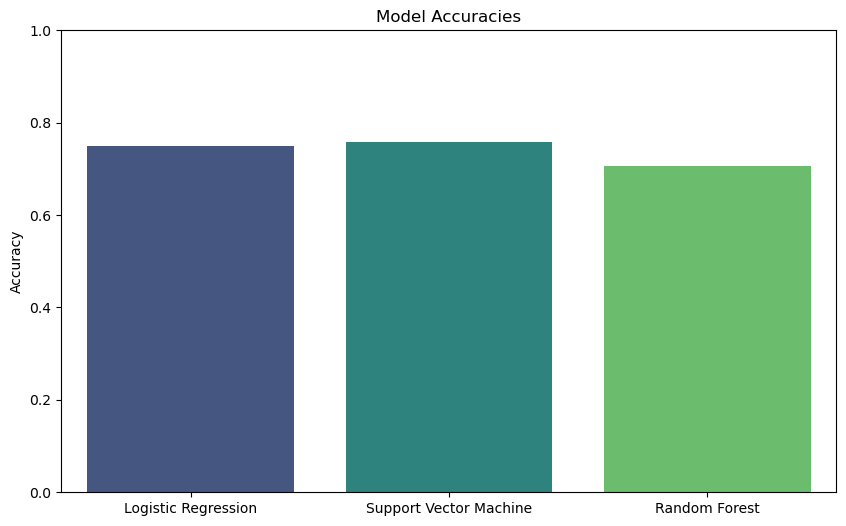

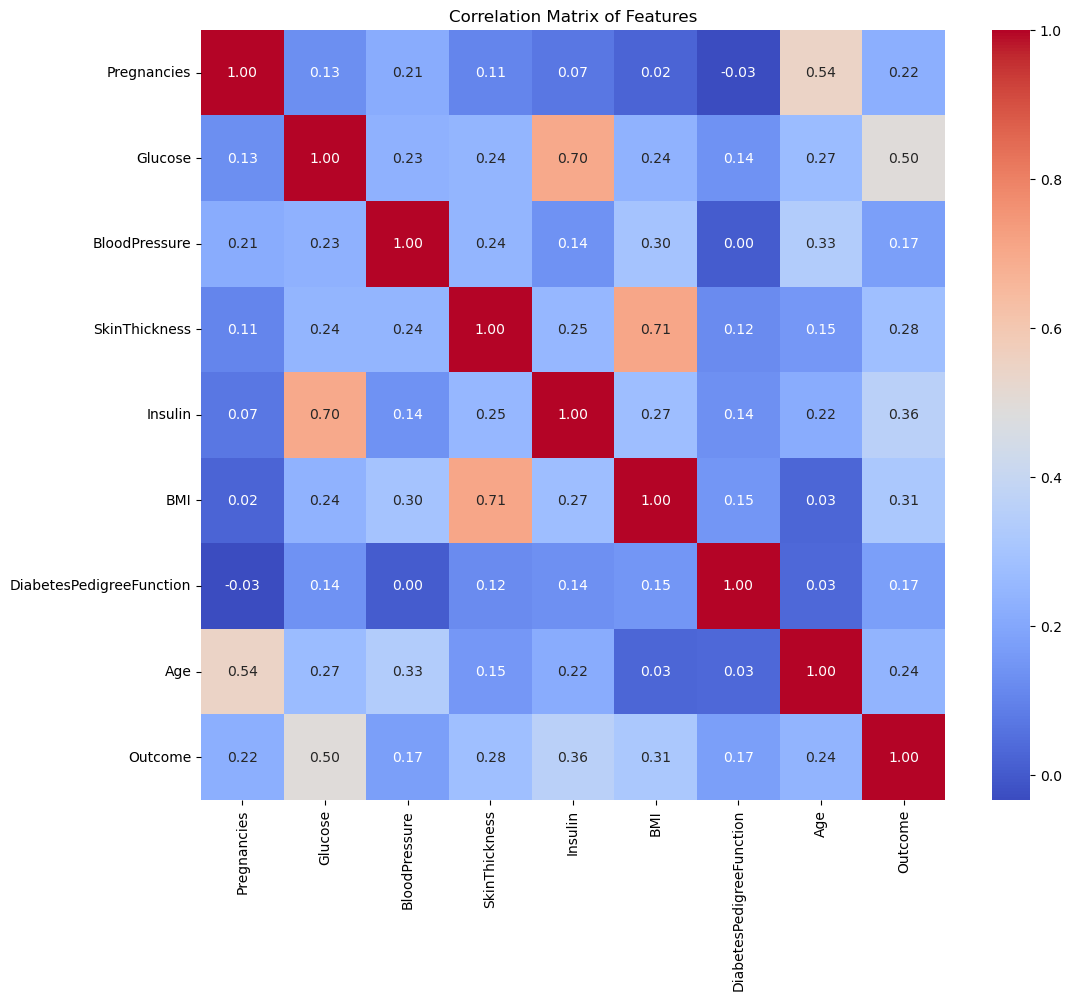

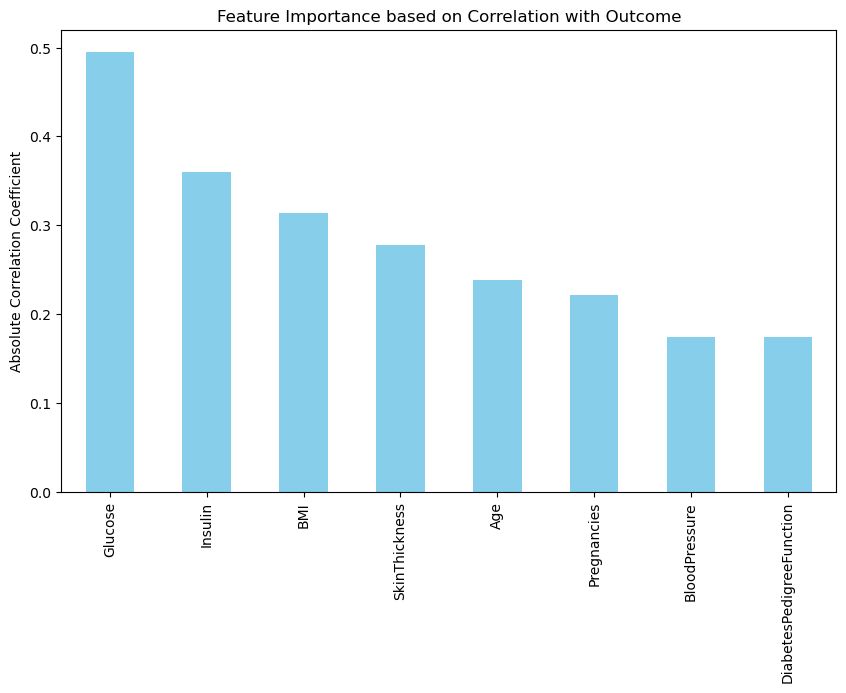

Independent Variable: Pregnancies


/Users/mahsadorri/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


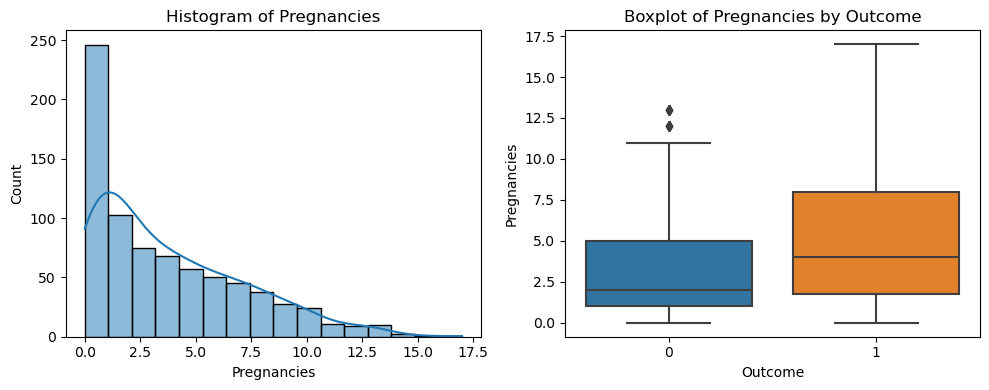

Independent Variable: Glucose


/Users/mahsadorri/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


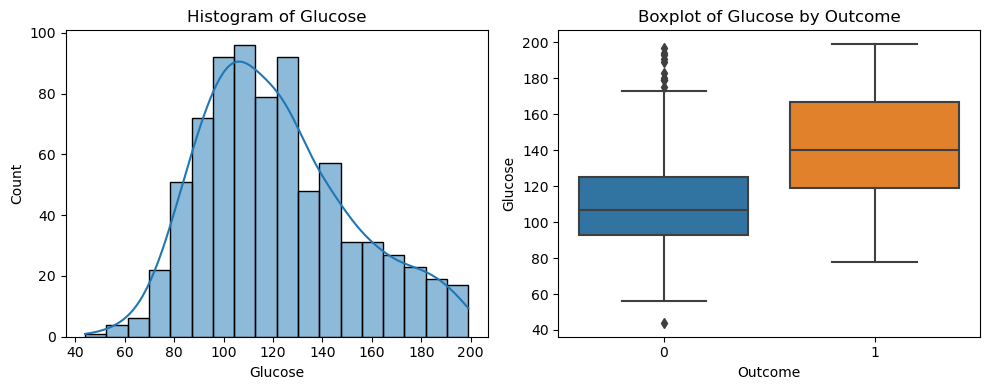

Independent Variable: BloodPressure


/Users/mahsadorri/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


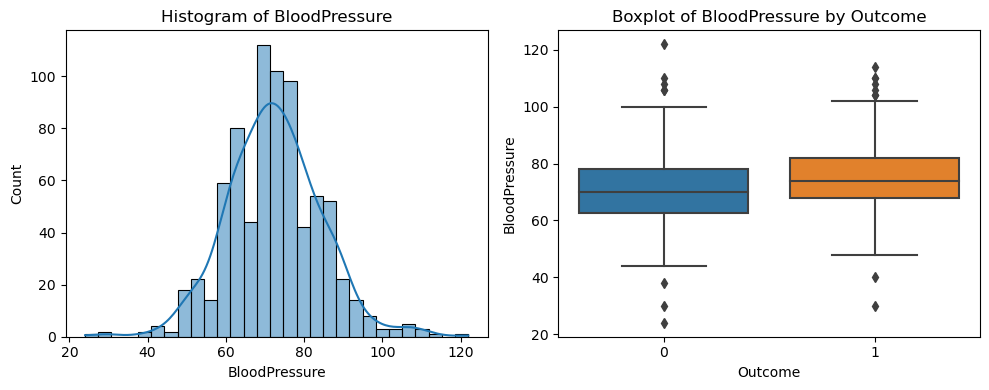

Independent Variable: SkinThickness


/Users/mahsadorri/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


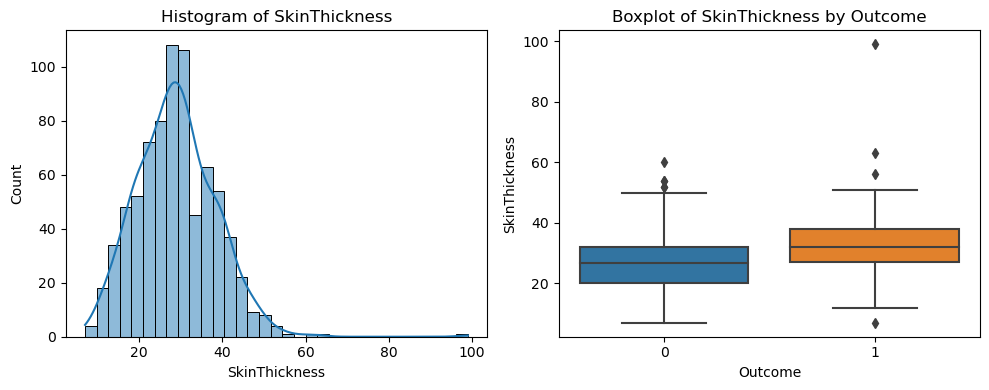

/Users/mahsadorri/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Independent Variable: Insulin


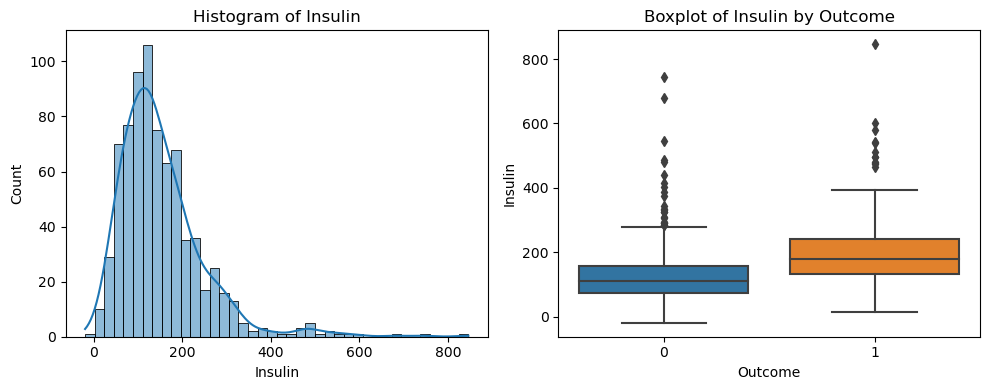

Independent Variable: BMI


/Users/mahsadorri/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


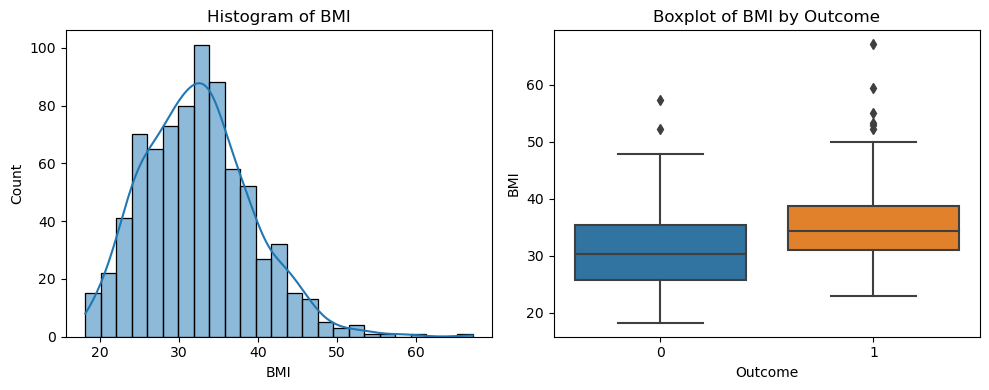

Independent Variable: DiabetesPedigreeFunction


/Users/mahsadorri/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


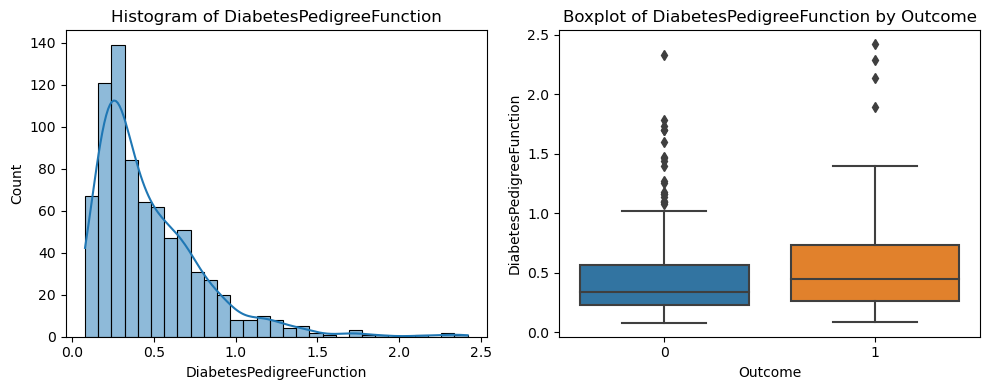

Independent Variable: Age


/Users/mahsadorri/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


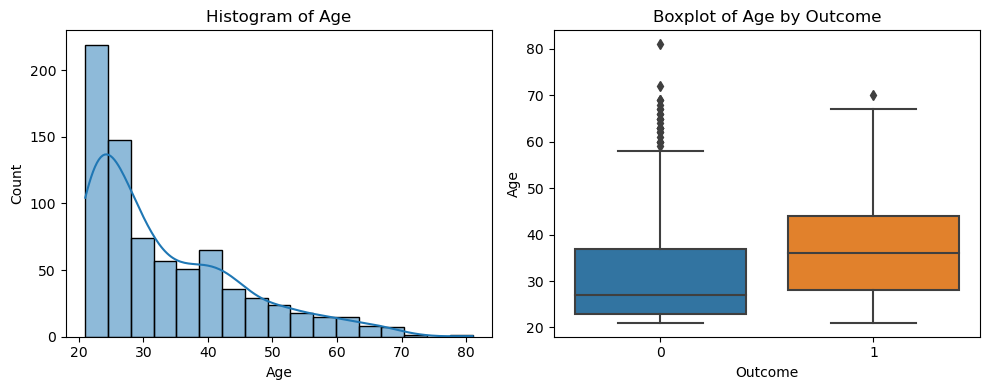

In [8]:
# Create a bar chart of accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.show()

# Calculate and visualize the correlation matrix
correlation_matrix = data_imputed.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Create the bar chart of feature importances based on correlation with Outcome
plt.figure(figsize=(10, 6))
outcome_correlation = correlation_matrix['Outcome'].drop('Outcome').abs().sort_values(ascending=False)
outcome_correlation.plot(kind='bar', color='skyblue')
plt.title('Feature Importance based on Correlation with Outcome')
plt.ylabel('Absolute Correlation Coefficient')
plt.show()


def variable_analysis(data, feature, outcome):
    # Calculate Descriptive Statistics
    desc = data[feature].describe()
    
    # Additional statistics
    desc.loc['skewness'] = data[feature].skew()
    desc.loc['kurtosis'] = data[feature].kurt()
    
    # Create a DataFrame for the statistics
    desc_df = pd.DataFrame(desc).transpose()
    
    # Histogram
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    
    # Boxplot against Outcome
    plt.subplot(1, 2, 2)
    sns.boxplot(x=outcome, y=data[feature])
    plt.title(f'Boxplot of {feature} by Outcome')
    plt.tight_layout()
    plt.show()
    
    return desc_df

# Assuming 'data_imputed' is your DataFrame and 'Outcome' is the name of your outcome column
# Example usage:
for feature in data_imputed.columns.drop('Outcome'):
    print(f"Independent Variable: {feature}")
    _ = variable_analysis(data_imputed, feature, data_imputed['Outcome'])